# ***Restaurants and food markets health inspections***

# ***Context: LA Restaurant Inspections Dataset***
This dataset contains information about restaurant inspections conducted by the Los Angeles Health Department for permitted food establishments. The inspections aim to ensure compliance with food safety regulations and promote public health. Restaurants are evaluated on various criteria and assigned grades on an A-C scale based on their performance.

# **Content:**
Dataset includes activity date,facility name,service code,programe name,owner name and description(s).id',

# 1.   Know Your Data:



# Import Libraries :



In [325]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First we will load the Restaurant inspection CSV into a pandas dataframe.

In [328]:
data = pd.read_csv("inspection.csv")

Now we check the number of rows and columns in the dataframe.

In [330]:
data.shape

(67573, 21)

So we have total of 67573 rows and 21 columns in our dataframe.


Dataset First View

In [335]:
#Show the first 5 rows of the dataset
data.head()

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,0
0,DAJ00E07B,12/29/2017 12:00:00 AM,HABITAT COFFEE SHOP,95.0,A,1.0,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,...,CA,90065,OW0178123,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,HABITAT COFFEE SHOP,ACTIVE,PR0160774,NaN
1,DAQOKRFZB,12/29/2017 12:00:00 AM,REILLY'S,NaN,A,1.0,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,...,CA,NaN,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,REILLY'S,ACTIVE,PR0193026,NaN
2,DASJI4LUR,12/29/2017 12:00:00 AM,STREET CHURROS,93.0,NaN,1.0,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,...,CA,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630.0,STREET CHURROS,ACTIVE,PR0179282,NaN
3,DA40LU5AT,12/29/2017 12:00:00 AM,TRINITI ECHO PARK,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,...,CA,90026-3227,OW0246287,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,NaN,ACTIVE,PR0201836,NaN
4,DAXV2RMYC,12/29/2017 12:00:00 AM,POLLEN,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,...,CA,90026,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,POLLEN,ACTIVE,PR0202148,NaN


Dataset Information


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67573 entries, 0 to 67572
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   serial_number        62745 non-null  object 
 1   activity_date        62752 non-null  object 
 2   facility_name        62786 non-null  object 
 3   score                62814 non-null  float64
 4   grade                62851 non-null  object 
 5   service_code         62847 non-null  float64
 6   service_description  62909 non-null  object 
 7   employee_id          62891 non-null  object 
 8   facility_address     62785 non-null  object 
 9   facility_city        63004 non-null  object 
 10  facility_id          62909 non-null  object 
 11  facility_state       62798 non-null  object 
 12  facility_zip         62728 non-null  object 
 13  owner_id             62947 non-null  object 
 14  owner_name           62828 non-null  object 
 15  pe_description       62734 non-null 

In [340]:
# Generate descriptive statistics.
data.describe()

,score,service_code,program_element_pe,0
count,62814.000000,62847.000000,62829.000000,0.0
mean,93.370809,7.651073,1629.476914,NaN
std,3.972517,51.149136,9.406911,NaN
min,64.000000,1.000000,1610.000000,NaN
25%,91.000000,1.000000,1631.000000,NaN
50%,94.000000,1.000000,1632.000000,NaN
75%,96.000000,1.000000,1635.000000,NaN
max,100.000000,401.000000,1641.000000,NaN


In [342]:
data.columns

Index(['serial_number', 'activity_date', 'facility_name', 'score', 'grade',
       'service_code', 'service_description', 'employee_id',
       'facility_address', 'facility_city', 'facility_id', 'facility_state',
       'facility_zip', 'owner_id', 'owner_name', 'pe_description',
       'program_element_pe', 'program_name', 'program_status', 'record_id',
       '0'],
      dtype='object')

In [344]:
data.dtypes

serial_number           object
activity_date           object
facility_name           object
score                  float64
grade                   object
service_code           float64
service_description     object
employee_id             object
facility_address        object
facility_city           object
facility_id             object
facility_state          object
facility_zip            object
owner_id                object
owner_name              object
pe_description          object
program_element_pe     float64
program_name            object
program_status          object
record_id               object
0                      float64
dtype: object

In [346]:
#Categorical Features
cat_features = data.select_dtypes(include=['object','bool']).columns.tolist()
cat_features

['serial_number',
 'activity_date',
 'facility_name',
 'grade',
 'service_description',
 'employee_id',
 'facility_address',
 'facility_city',
 'facility_id',
 'facility_state',
 'facility_zip',
 'owner_id',
 'owner_name',
 'pe_description',
 'program_name',
 'program_status',
 'record_id']

In [348]:
# Identify high cardinality categorical features

for feature in cat_features:
    print(feature, data[feature].nunique())

serial_number 62745
activity_date 859
facility_name 11975
grade 4
service_description 2
employee_id 143
facility_address 11714
facility_city 1
facility_id 13446
facility_state 1
facility_zip 1041
owner_id 11697
owner_name 11497
pe_description 30
program_name 12830
program_status 2
record_id 14450


In [349]:
#identification of numeric features
num_features = data.select_dtypes(exclude=['object','bool']).columns.tolist()
num_features

['score', 'service_code', 'program_element_pe', '0']

In [352]:
data2=data.copy()



# 2.   Exploratory Data Analysis for the dataset :



# distribution of scores by grade


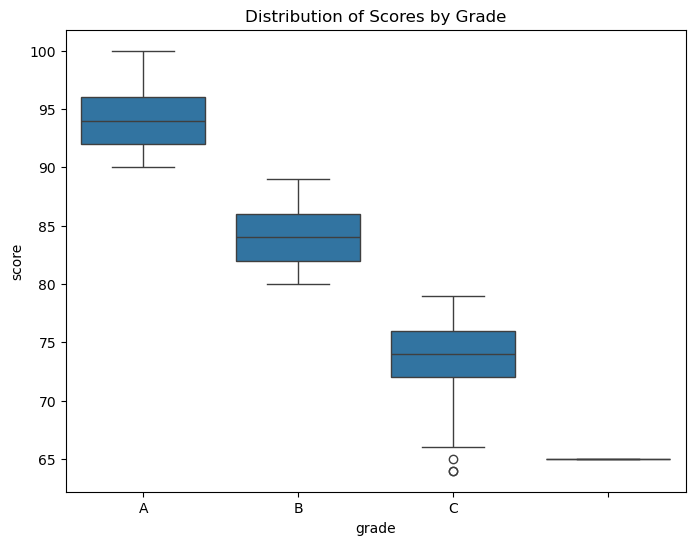

In [356]:
df_selected = data
df_selected
plt.figure(figsize=(8, 6))
sns.boxplot(x='grade', y='score', data=data)
plt.title("Distribution of Scores by Grade")
plt.show()

# distribution of facilities by count of line items


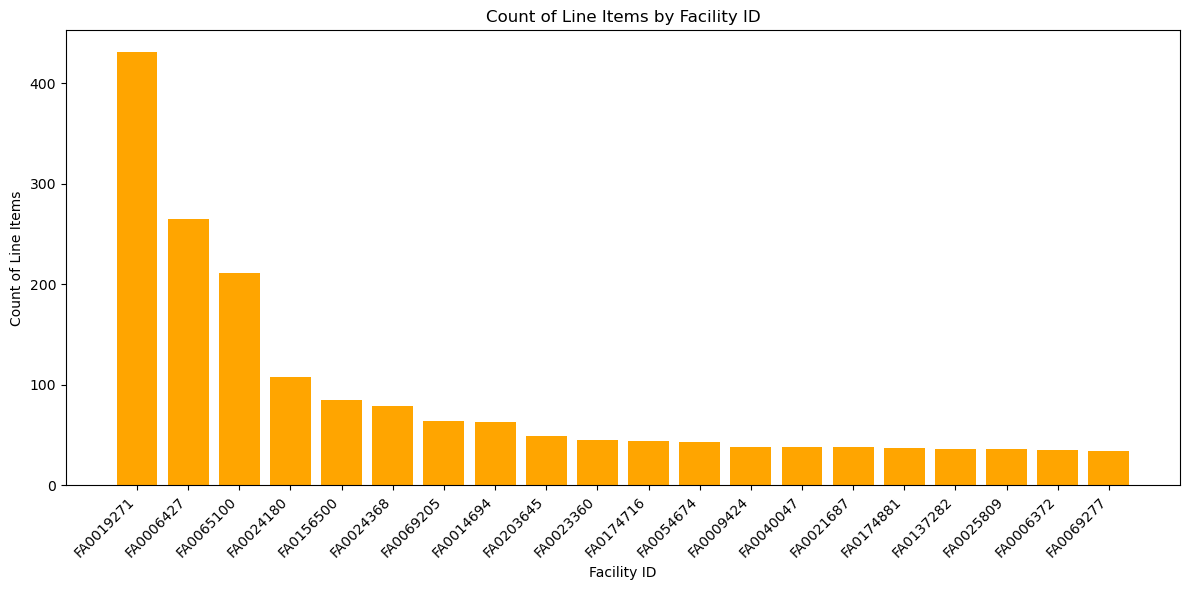

In [359]:
grouped_data = data.groupby('facility_id').size().reset_index(name='line_items_count')
sorted_data = grouped_data.sort_values(by='line_items_count', ascending=False)
top_data = sorted_data.head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_data['facility_id'], top_data['line_items_count'], color='orange')
plt.xlabel('Facility ID')
plt.ylabel('Count of Line Items')
plt.title('Count of Line Items by Facility ID')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

'facility_id' value 'FA0019271' has highest count of line items 

# Types of Services and their distribution


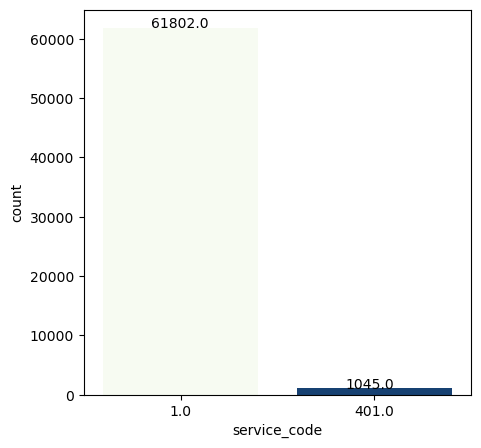

In [363]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['service_code'], palette="GnBu", data=data, hue='service_code', legend=False)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

# Types of program status and their distribution


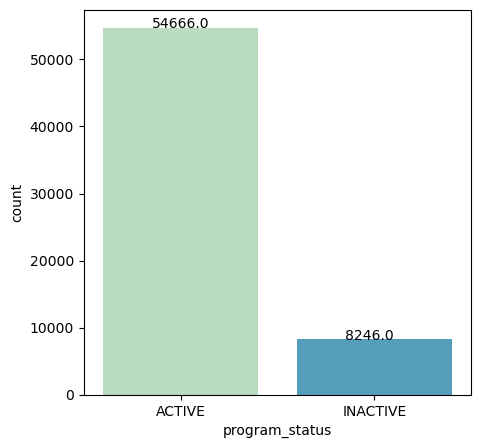

In [366]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['program_status'], palette="GnBu", data=data, hue='program_status', legend=False)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

# Most famous restaurant chains in LA

C:\Users\asus\AppData\Local\Temp\ipykernel_25400\3372864192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette='Set1')


Text(0.5, 0, 'Number of outlets')

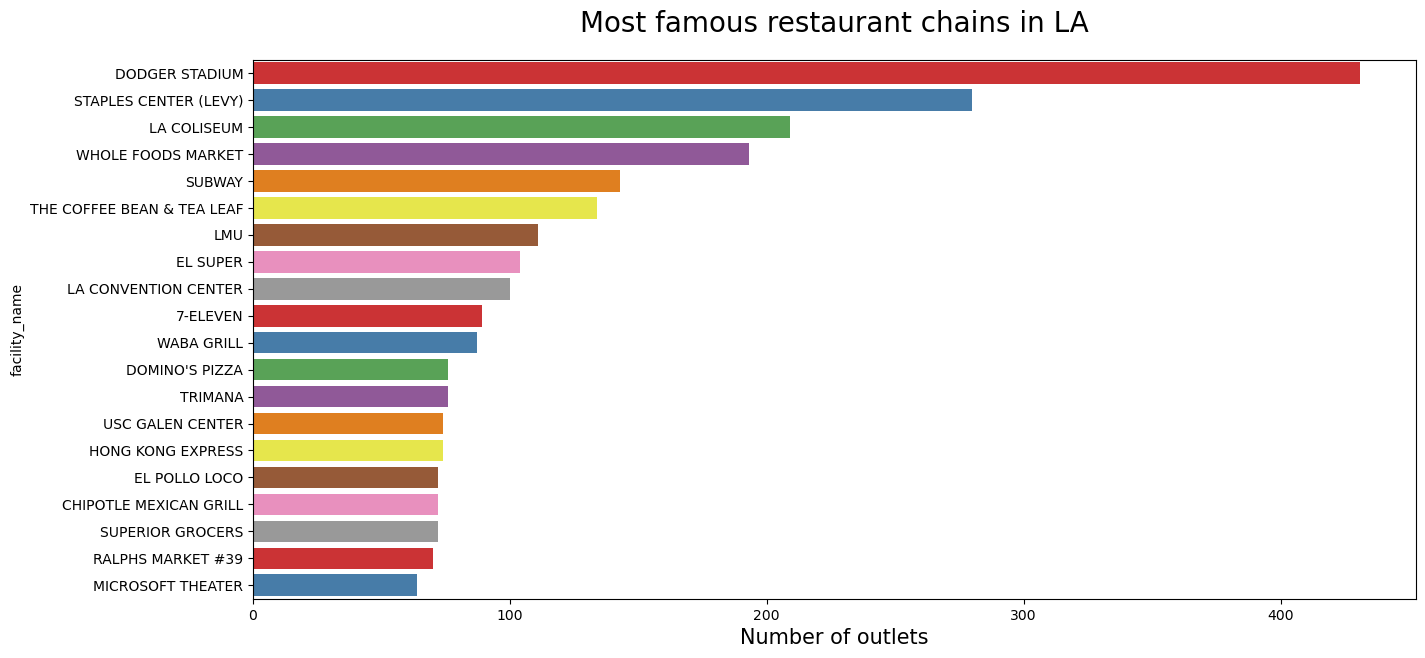

In [368]:
plt.figure(figsize=(15,7))
chains=data['facility_name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in LA",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

# distribution of facility scores

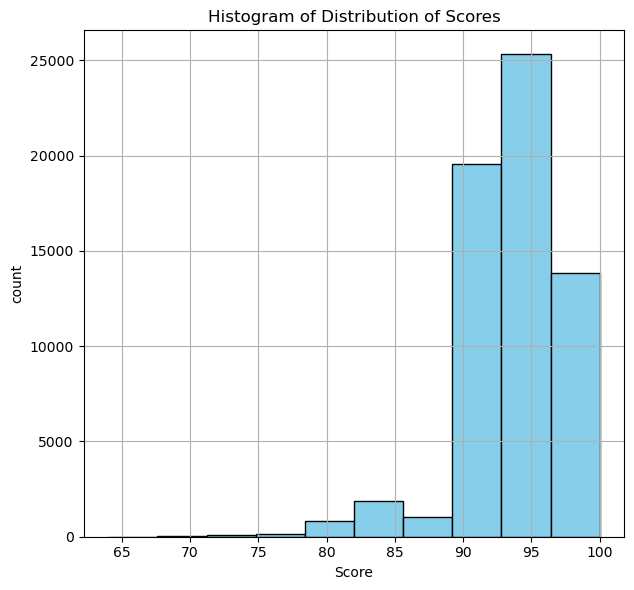

In [371]:
# Plotting the distribution of facility scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
data['score'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('count')
plt.tight_layout()  
plt.show()

# distribution of grades

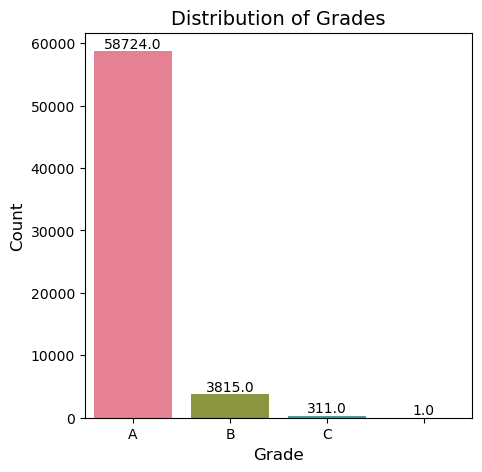

In [374]:
unique_grades = data['grade'].nunique()
custom_palette = sns.color_palette("husl", unique_grades)
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=data['grade'], palette=custom_palette ,hue=data['grade'], dodge=False, legend=False) 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),  
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.title("Distribution of Grades", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# visualisation of missing values

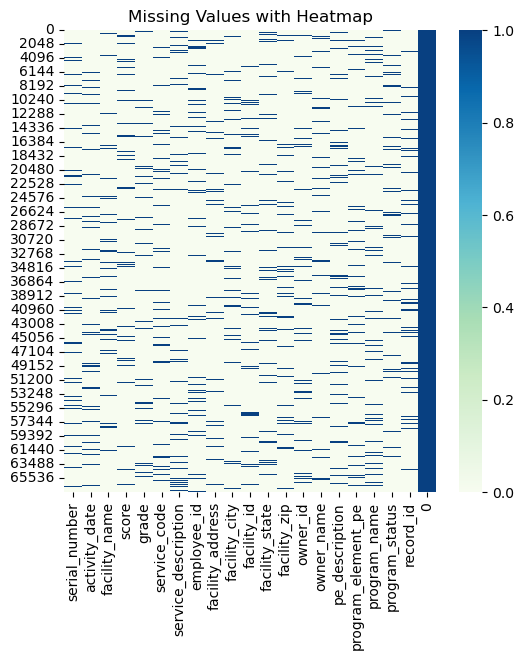

In [377]:
plt.figure(figsize=(6, 6))
sns.heatmap(data=data.isnull(),cbar=True, cmap="GnBu")
plt.title('Missing Values with Heatmap')
plt.show()

# 3. Data Preparation and Cleaning

creation of new features year, month and day from an existing feature which is activity date

In [381]:
# Convertir 'activity_date' en format datetime, en gérant les erreurs de conversion
data['activity_date'] = pd.to_datetime(data['activity_date'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')
print(data['activity_date'].isna().sum())
# Appliquer l'interpolation uniquement sur les dates valides
data['activity_date'] = data['activity_date'].interpolate(method='linear', limit_direction='forward')
print(data['activity_date'].isna().sum())
# Extraire l'année, le mois et le jour de la colonne 'activity_date'
data['year'] = data['activity_date'].dt.year
data['month'] = data['activity_date'].dt.month
data['day'] = data['activity_date'].dt.day

# Copier les valeurs extraites dans data2
data2[['year', 'month', 'day']] = data[['year', 'month', 'day']]

# Afficher les premiers résultats de data2
data2.head()


29512
0


,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,0,year,month,day
0,DAJ00E07B,12/29/2017 12:00:00 AM,HABITAT COFFEE SHOP,95.0,A,1.0,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,...,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,HABITAT COFFEE SHOP,ACTIVE,PR0160774,NaN,2017,12,29
1,DAQOKRFZB,12/29/2017 12:00:00 AM,REILLY'S,NaN,A,1.0,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,...,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,REILLY'S,ACTIVE,PR0193026,NaN,2017,12,29
2,DASJI4LUR,12/29/2017 12:00:00 AM,STREET CHURROS,93.0,NaN,1.0,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,...,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630.0,STREET CHURROS,ACTIVE,PR0179282,NaN,2017,12,29
3,DA40LU5AT,12/29/2017 12:00:00 AM,TRINITI ECHO PARK,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,...,NaN,RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,NaN,ACTIVE,PR0201836,NaN,2017,12,29
4,DAXV2RMYC,12/29/2017 12:00:00 AM,POLLEN,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,...,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631.0,POLLEN,ACTIVE,PR0202148,NaN,2017,12,29


now we have 24 columns !

checking for missing values 

In [384]:
data2.isnull().sum()

serial_number           4828
activity_date           4821
facility_name           4787
score                   4759
grade                   4722
service_code            4726
service_description     4664
employee_id             4682
facility_address        4788
facility_city           4569
facility_id             4664
facility_state          4775
facility_zip            4845
owner_id                4626
owner_name              4745
pe_description          4839
program_element_pe      4744
program_name            4722
program_status          4661
record_id               4786
0                      67573
year                       0
month                      0
day                        0
dtype: int64

creating new variable data2 where we stock the dataset with no duplicate values 

In [386]:
valeurs_uniques = data2['pe_description'].unique()
print(valeurs_uniques, "\n")

['RESTAURANT (0-30) SEATS MODERATE RISK'
 'RESTAURANT (0-30) SEATS LOW RISK' 'RESTAURANT (0-30) SEATS HIGH RISK'
 'FOOD MKT RETAIL (2,000+ SF) LOW RISK'
 'RESTAURANT (61-150) SEATS HIGH RISK'
 'RESTAURANT (31-60) SEATS HIGH RISK' nan
 'RESTAURANT (61-150) SEATS MODERATE RISK'
 'RESTAURANT (151 + ) SEATS HIGH RISK'
 'RESTAURANT (31-60) SEATS MODERATE RISK'
 'FOOD MKT RETAIL (1-1,999 SF) HIGH RISK'
 'RESTAURANT (151 + ) SEATS MODERATE RISK'
 'FOOD MKT RETAIL (2,000+ SF) MODERATE RISK'
 'RESTAURANT (31-60) SEATS LOW RISK' 'RESTAURANT (151 + ) SEATS LOW RISK'
 'FOOD MKT RETAIL (2,000+ SF) HIGH RISK'
 'FOOD MKT RETAIL (1-1,999 SF) LOW RISK'
 'FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK'
 'RESTAURANT (61-150) SEATS LOW RISK'
 'FOOD PROCESSING WHOLESALE (2,000-5,999 SF)'
 'FOOD MKT RETAIL (25-1,999 SF) HIGH RISK'
 'LIC HTH CARE FOOD FAC (4000-9999 SF)HIGH RISK'
 'FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK' 'FOOD MARKET WHOLESALE'
 'CATERER (0-999 SQ. FT.)' 'FOOD MKT RETAIL (25-1,999 SF) LOW R

The code extracts facility type, size, and risk level from pe_description, then replaces unrecognized types with 'OTHER' to ensure consistency.

In [388]:
data2[['type', 'size', 'risk_level']] = data['pe_description'].str.extract(
    r'(^RESTAURANT|^FOOD MKT RETAIL|^[A-Z\s]+)\s\(([^)]+)\)\s(?:SEATS|SF|SQ\. FT\.)?\s?((?:HIGH|MODERATE|LOW)?\s?RISK)?'
)
#replace unrecognized types with 'OTHER'
data2.loc[: , 'type'] = data2['type'].replace({None: 'OTHER'}).apply(lambda x: x if x in ['RESTAURANT', 'FOOD MKT RETAIL'] else 'OTHER')

In [389]:
#show unique values for each column
print("Valeurs uniques pour 'type':")
print(data2['type'].unique())

print("\nValeurs uniques pour 'size':")
print(data2['size'].unique())

print("\nValeurs uniques pour 'risk_level':")
print(data2['risk_level'].unique())


Valeurs uniques pour 'type':
['RESTAURANT' 'FOOD MKT RETAIL' 'OTHER']

Valeurs uniques pour 'size':
['0-30' '2,000+ SF' '61-150' '31-60' nan '151 + ' '1-1,999 SF'
 '25-1,999 SF' '1-4,999']

Valeurs uniques pour 'risk_level':
['MODERATE RISK' 'LOW RISK' 'HIGH RISK' nan]


The code calculates and displays the number of missing (NaN) values for each column in the data2 .

In [393]:
nan_counts = data2.isna().sum()
print("Nombre de NaN par colonne :")
print(nan_counts)

Nombre de NaN par colonne :
serial_number           4828
activity_date           4821
facility_name           4787
score                   4759
grade                   4722
service_code            4726
service_description     4664
employee_id             4682
facility_address        4788
facility_city           4569
facility_id             4664
facility_state          4775
facility_zip            4845
owner_id                4626
owner_name              4745
pe_description          4839
program_element_pe      4744
program_name            4722
program_status          4661
record_id               4786
0                      67573
year                       0
month                      0
day                        0
type                       0
size                    4878
risk_level              4879
dtype: int64


The code removes rows from data2 where the risk_level or size columns contain missing (NaN) values.

data2 = data2.dropna(subset=['risk_level', 'size'])

# dealing with owner name missing values :
This code groups the data by owner_id, finds the most frequent owner_name for each owner_id, merges it with the original data, and fills missing owner_name values with the most frequent ones.

In [399]:
owner_mode = data2.groupby('owner_id')['owner_name'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
owner_mode.columns = ['owner_id', 'most_frequent_owner_name']

# Fusionner data2 avec les valeurs de mode pour chaque owner_id
data2 = data2.merge(owner_mode, on='owner_id', how='left')

# Remplacer les valeurs NaN dans 'owner_name' avec 'most_frequent_owner_name'
data2['owner_name'] = data2['owner_name'].combine_first(data2['most_frequent_owner_name'])

# Supprimer la colonne temporaire 'most_frequent_owner_name'
data2 = data2.drop(columns=['most_frequent_owner_name'])


In [402]:
data2.head()

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,program_name,program_status,record_id,0,year,month,day,type,size,risk_level
0,DAJ00E07B,12/29/2017 12:00:00 AM,HABITAT COFFEE SHOP,95.0,A,1.0,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,...,HABITAT COFFEE SHOP,ACTIVE,PR0160774,NaN,2017,12,29,RESTAURANT,0-30,MODERATE RISK
1,DAQOKRFZB,12/29/2017 12:00:00 AM,REILLY'S,NaN,A,1.0,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,...,REILLY'S,ACTIVE,PR0193026,NaN,2017,12,29,RESTAURANT,0-30,MODERATE RISK
2,DASJI4LUR,12/29/2017 12:00:00 AM,STREET CHURROS,93.0,NaN,1.0,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,...,STREET CHURROS,ACTIVE,PR0179282,NaN,2017,12,29,RESTAURANT,0-30,LOW RISK
3,DA40LU5AT,12/29/2017 12:00:00 AM,TRINITI ECHO PARK,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,...,NaN,ACTIVE,PR0201836,NaN,2017,12,29,RESTAURANT,0-30,MODERATE RISK
4,DAXV2RMYC,12/29/2017 12:00:00 AM,POLLEN,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,...,POLLEN,ACTIVE,PR0202148,NaN,2017,12,29,RESTAURANT,0-30,MODERATE RISK


# dealing with owner id missing values :
This code groups the data by owner_name, finds the most frequent owner_id for each owner_name, merges it with the original data, and fills missing owner_id values with the most frequent ones.


In [405]:
owner_mode = data2.groupby('owner_name')['owner_id'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
owner_mode.columns = ['owner_name', 'most_frequent_owner_id']

# Fusionner data2 avec les valeurs de mode pour chaque owner_id
data2 = data2.merge(owner_mode, on='owner_name', how='left')

# Remplacer les valeurs NaN dans 'owner_name' avec 'most_frequent_owner_name'
data2['owner_id'] = data2['owner_id'].combine_first(data2['most_frequent_owner_id'])

# Supprimer la colonne temporaire 'most_frequent_owner_name'
data2 = data2.drop(columns=['most_frequent_owner_id'])


# dealing with facility id missing values:
The code fills missing facility_id values by replacing them with the most frequent facility_id within each facility_zip and then removes the temporary column used for this replacement.

In [407]:
facilityid_mode = data2.groupby('facility_zip')['facility_id'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
facilityid_mode.columns = ['facility_zip', 'most_frequent_facility_id']

# Fusionner data2 avec les valeurs de mode pour chaque owner_id
data2 = data2.merge(facilityid_mode, on='facility_zip', how='left')

# Remplacer les valeurs NaN dans 'owner_name' avec 'most_frequent_owner_name'
data2['facility_id'] = data2['facility_id'].combine_first(data2['most_frequent_facility_id'])

# Supprimer la colonne temporaire 'most_frequent_owner_name'
data2 = data2.drop(columns=['most_frequent_facility_id'])


# dealing with facility zip missing values:
The code replaces missing facility_zip values in data2 by using the most frequent facility_zip for each facility_id and then removes the temporary column containing the most frequent facility_zip.

In [409]:
facilityzip_mode = data2.groupby('facility_id')['facility_zip'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
facilityzip_mode.columns = ['facility_id', 'most_frequent_facility_zip']

# Fusionner data2 avec les valeurs de mode pour chaque owner_id
data2 = data2.merge(facilityzip_mode, on='facility_id', how='left')

# Remplacer les valeurs NaN dans 'owner_name' avec 'most_frequent_owner_name'
data2['facility_zip'] = data2['facility_zip'].combine_first(data2['most_frequent_facility_zip'])

# Supprimer la colonne temporaire 'most_frequent_owner_name'
data2 = data2.drop(columns=['most_frequent_facility_zip'])


# dealing with facility name missing values : 
The code replaces missing facility_name values in data2 by using the most frequent facility_name for each facility_id and then removes the temporary column containing the most frequent facility_name.

In [411]:
owner_mode = data2.groupby('facility_id')['facility_name'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
owner_mode.columns = ['facility_id', 'most_frequent_facility_name']

# Fusionner data2 avec les valeurs de mode pour chaque owner_id
data2 = data2.merge(owner_mode, on='facility_id', how='left')

# Remplacer les valeurs NaN dans 'owner_name' avec 'most_frequent_owner_name'
data2['facility_name'] = data2['facility_name'].combine_first(data2['most_frequent_facility_name'])

# Supprimer la colonne temporaire 'most_frequent_owner_name'
data2 = data2.drop(columns=['most_frequent_facility_name'])


# dealing with program element pe missing values :
The code fills missing program_element_pe values in data2 using the most frequent program_element_pe for each pe_description and then removes the temporary column used for the operation.

In [413]:
owner_mode = data2.groupby('pe_description')['program_element_pe'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
owner_mode.columns = ['pe_description', 'most_frequent_program_element_pe']

# Fusionner data2 avec les valeurs de mode pour chaque owner_id
data2 = data2.merge(owner_mode, on='pe_description', how='left')

# Remplacer les valeurs NaN dans 'owner_name' avec 'most_frequent_owner_name'
data2['program_element_pe'] = data2['program_element_pe'].combine_first(data2['most_frequent_program_element_pe'])

# Supprimer la colonne temporaire 'most_frequent_owner_name'
data2 = data2.drop(columns=['most_frequent_program_element_pe'])


# dealing with service code missing values :
The code imputes missing service_code values in data2 using the most frequent service_code for each service_description and removes the temporary helper column afterward.

In [415]:
service_mode_per_description = data2.groupby('service_description')['service_code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'UNKNOWN').reset_index()

# Renommer les colonnes pour fusionner facilement
service_mode_per_description.columns = ['service_description', 'most_frequent_service_code']

# Étape 2: Fusionner les données pour ajouter la colonne 'most_frequent_service_code' à data2
data2 = data2.merge(service_mode_per_description, on='service_description', how='left')

# Étape 3: Remplacer les NaN dans 'service_code' par la valeur la plus fréquente dans 'most_frequent_service_code'
data2['service_code'] = data2['service_code'].combine_first(data2['most_frequent_service_code'])

# Supprimer la colonne temporaire 'most_frequent_service_code'
data2 = data2.drop(columns=['most_frequent_service_code'])

# dealing with employee id missing values :
The code imputes missing employee_id values in data2 by assigning the most frequent employee_id .

In [417]:
most_frequent_employee_id = data2['employee_id'].mode().iloc[0] if not data2['employee_id'].mode().empty else 'UNKNOWN'

# Replace NaN values in 'employee_id' with the most frequent value
data2['employee_id'] = data2['employee_id'].fillna(most_frequent_employee_id)

In [418]:
data2.isna().sum()

serial_number           4828
activity_date           4821
facility_name            169
score                   4759
grade                   4722
service_code             314
service_description     4664
employee_id                0
facility_address        4788
facility_city           4569
facility_id              332
facility_state          4775
facility_zip             449
owner_id                 435
owner_name               418
pe_description          4839
program_element_pe       333
program_name            4722
program_status          4661
record_id               4786
0                      67573
year                       0
month                      0
day                        0
type                       0
size                    4878
risk_level              4879
dtype: int64

In [420]:
data2.head()

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,...,program_name,program_status,record_id,0,year,month,day,type,size,risk_level
0,DAJ00E07B,12/29/2017 12:00:00 AM,HABITAT COFFEE SHOP,95.0,A,1.0,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,...,HABITAT COFFEE SHOP,ACTIVE,PR0160774,NaN,2017,12,29,RESTAURANT,0-30,MODERATE RISK
1,DAQOKRFZB,12/29/2017 12:00:00 AM,REILLY'S,NaN,A,1.0,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,...,REILLY'S,ACTIVE,PR0193026,NaN,2017,12,29,RESTAURANT,0-30,MODERATE RISK
2,DASJI4LUR,12/29/2017 12:00:00 AM,STREET CHURROS,93.0,NaN,1.0,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,...,STREET CHURROS,ACTIVE,PR0179282,NaN,2017,12,29,RESTAURANT,0-30,LOW RISK
3,DA40LU5AT,12/29/2017 12:00:00 AM,TRINITI ECHO PARK,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,...,NaN,ACTIVE,PR0201836,NaN,2017,12,29,RESTAURANT,0-30,MODERATE RISK
4,DAXV2RMYC,12/29/2017 12:00:00 AM,POLLEN,94.0,A,1.0,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,...,POLLEN,ACTIVE,PR0202148,NaN,2017,12,29,RESTAURANT,0-30,MODERATE RISK


removing the restant null values 

In [423]:
data2 = data2.dropna(subset=['owner_name'])
data2 = data2.dropna(subset=['facility_id'])
data2 = data2.dropna(subset=['service_code'])
data2 = data2.dropna(subset=['owner_id'])
data2 = data2.dropna(subset=['facility_zip'])
data2 = data2.dropna(subset=['facility_name'])
data2 = data2.dropna(subset=['program_element_pe'])


checking for the missing values after deleting them 

In [425]:
data2.isna().sum()

serial_number           4724
activity_date           4689
facility_name              0
score                   4612
grade                   4583
service_code               0
service_description     4251
employee_id                0
facility_address        4658
facility_city           4458
facility_id                0
facility_state          4661
facility_zip               0
owner_id                   0
owner_name                 0
pe_description          4411
program_element_pe         0
program_name            4603
program_status          4535
record_id               4656
0                      65829
year                       0
month                      0
day                        0
type                       0
size                    4447
risk_level              4448
dtype: int64

# dealing with score and grade missing values :
Fills missing grade based on score ranges, replaces missing score with the median for its grade, and removes rows where both score and grade are missing.

In [427]:
# Étape 1: Supprimer les lignes où 'score' et 'grade' sont tous les deux NaN
data2 = data2.dropna(subset=['score', 'grade'], how='all')

# Étape 2: Remplacer la valeur de 'grade' en fonction du 'score'
def assign_grade(score):
    if score >= 90 and score <= 100:
        return 'A'
    elif score >= 80 and score < 90:
        return 'B'
    else:
        return 'C'

# Appliquer la fonction 'assign_grade' sur la colonne 'score' pour remplir la colonne 'grade'
data2['grade'] = data2['grade'].fillna(data2['score'].apply(assign_grade))

# Étape 3: Calculer la médiane du 'score' pour chaque 'grade' et remplacer les scores manquants
grade_medians = data2.groupby('grade')['score'].median().reset_index()
grade_medians.columns = ['grade', 'median_score']

# Fusionner pour obtenir les médianes de 'score' par 'grade'
data2 = data2.merge(grade_medians, on='grade', how='left')

# Remplacer les scores manquants par la médiane du 'score' pour chaque grade
data2['score'] = data2['score'].combine_first(data2['median_score'])

# Supprimer la colonne temporaire 'median_score'
data2 = data2.drop(columns=['median_score'])


# dealing with program status missing values :
The code identifies the least frequent value in the 'program_status' column and fills any missing values in that column with this least frequent value.

In [430]:
least_frequent_status = data2['program_status'].value_counts().idxmin()
data2['program_status'] = data2['program_status'].fillna(least_frequent_status)


This code drops specific columns from data2 and then calculates the number of missing values (NaN) in each remaining column.

In [433]:
data2 = data2.drop(columns=[col for col in ['record_id','facility_city','facility_state','serial_number','0'
                              ,'service_description','pe_description','facility_address','program_name'
                              ,'activity_date'] if col in data2.columns])
data2.isna().sum()


facility_name            0
score                    0
grade                    0
service_code             0
employee_id              0
facility_id              0
facility_zip             0
owner_id                 0
owner_name               0
program_element_pe       0
program_status           0
year                     0
month                    0
day                      0
type                     0
size                  4424
risk_level            4425
dtype: int64

In [434]:
data2.shape

(65508, 17)

# Encoding 

This code replaces empty strings or spaces in the 'grade' column with 'Unknown', applies an ordinal encoding to'grade' with predefined categories ('Unknown', 'C', 'B', 'A').

In [437]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Remplacer les chaînes vides ou les espaces par 'Unknown'
data2['grade'] = data2['grade'].replace(' ', 'Unknown')

# Initialiser l'OrdinalEncoder avec les catégories ordonnées
encoder = OrdinalEncoder(categories=[['Unknown', 'C', 'B', 'A']])

# Appliquer l'encodeur à la colonne 'grade'
data2[['grade']] = encoder.fit_transform(data2[['grade']])

# Afficher la forme des données et les 5 premières lignes de la colonne encodée
print("Forme des données :", data2.shape)
print("Encodage ordinal de 'grade' :")
print(data2['grade'].head())


Forme des données : (65508, 17)
Encodage ordinal de 'grade' :
0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: grade, dtype: float64


This code defines an OrdinalEncoder with a custom order of categories ('LOW RISK', 'MODERATE RISK', 'HIGH RISK'), applies it to the 'risk_level' column, and transforms the values to numeric representations, with unknown values encoded as -1.

In [439]:
data2['risk_level'].unique()
from sklearn.preprocessing import OrdinalEncoder

# Définir l'encodeur avec l'ordre personnalisé des catégories
ordinal = OrdinalEncoder(categories=[['LOW RISK', 'MODERATE RISK', 'HIGH RISK']], handle_unknown='use_encoded_value', unknown_value=-1)

# Appliquer l'encodeur à la colonne 'level_of_risk'
data2['risk_level'] = ordinal.fit_transform(data2['risk_level'].values.reshape(-1, 1))

# Vérifier les résultats de la transformation
print(data2['risk_level'].head())

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: risk_level, dtype: float64


shows unique values for each feature :

In [441]:
print("Valeurs uniques pour 'type':")
print(data2['type'].unique())

print("\nValeurs uniques pour 'size':")
print(data2['size'].unique())

print("\nValeurs uniques pour 'risk_level':")
print(data2['risk_level'].unique())

Valeurs uniques pour 'type':
['RESTAURANT' 'FOOD MKT RETAIL' 'OTHER']

Valeurs uniques pour 'size':
['0-30' '2,000+ SF' '61-150' '31-60' nan '151 + ' '1-1,999 SF'
 '25-1,999 SF' '1-4,999']

Valeurs uniques pour 'risk_level':
[ 1.  0.  2. -1.]


In [442]:
data2['type'].unique()
from sklearn.preprocessing import OrdinalEncoder

# Définir l'encodeur avec l'ordre personnalisé des catégories
ordinal = OrdinalEncoder(categories=[['RESTAURANT', 'FOOD MKT RETAIL', 'OTHER']], handle_unknown='use_encoded_value', unknown_value=-1)

# Appliquer l'encodeur à la colonne 'level_of_risk'
data2['type'] = ordinal.fit_transform(data2['type'].values.reshape(-1, 1))

# Vérifier les résultats de la transformation
print(data2['type'].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: type, dtype: float64


In [443]:
# Encode 'program_status' as ordinal values
data2['program_status'] = pd.Categorical(data2['program_status']).codes

# Display the ordinal encoding of 'program_status'
print("Encodage ordinal de 'program_status':")
print(data2['program_status'].value_counts())
print(data2['program_status'].head(15), "\n")



Encodage ordinal de 'program_status':
program_status
0    53106
1    12402
Name: count, dtype: int64
0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
Name: program_status, dtype: int8 



This code performs binary encoding on the 'service_code' column in data2, where the most frequent service code is encoded as 1, and all other service codes are encoded as 0.

In [445]:
value_counts_service_code = data2['service_code'].value_counts()
most_frequent_service_code = value_counts_service_code.idxmax()
data2['service_code'] = data2['service_code'].apply(lambda x: 1 if x == most_frequent_service_code else 0)

# Afficher l'encodage binaire de 'service_code'
print("Encodage binaire de 'service_code':")
print(data2['service_code'].value_counts())
print(data2['service_code'].head())


Encodage binaire de 'service_code':
service_code
1    64421
0     1087
Name: count, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: service_code, dtype: int64


In [447]:
data2 = data2.drop(columns=[col for col in ['date'] if col in data2.columns])

In [448]:
data2.head()

,facility_name,score,grade,service_code,employee_id,facility_id,facility_zip,owner_id,owner_name,program_element_pe,program_status,year,month,day,type,size,risk_level
0,HABITAT COFFEE SHOP,95.0,3.0,1,EE0000923,FA0170465,90065,OW0178123,GLASSELL COFFEE SHOP LLC,1631.0,0,2017,12,29,0.0,0-30,1.0
1,REILLY'S,94.0,3.0,1,EE0000633,FA0244690,90045,OW0208441,"AREAS SKYVIEW LAX JV, LLC",1631.0,0,2017,12,29,0.0,0-30,1.0
2,STREET CHURROS,93.0,3.0,1,EE0000835,FA0224109,90028,OW0228670,"STREETCHURROS, INC",1630.0,0,2017,12,29,0.0,0-30,0.0
3,TRINITI ECHO PARK,94.0,3.0,1,EE0000923,FA0252528,90026-3227,OW0246287,AMERICAN HOSPITALITY,1631.0,0,2017,12,29,0.0,0-30,1.0
4,POLLEN,94.0,3.0,1,EE0000923,FA0165365,90026,OW0246479,"POLLEN AND PASTRY , LLC",1631.0,0,2017,12,29,0.0,0-30,1.0


 Remove the 'EE' prefix and convert the employee_id to numeric


In [450]:
data2['employee_id'] = data2['employee_id'].astype(str)
data2['employee_id'] = data2['employee_id'].str.replace('EE', '', regex=False)  
data2['employee_id'] = pd.to_numeric(data2['employee_id'], errors='coerce')  

# Display the updated data
print(data2['employee_id'].head())


0    923
1    633
2    835
3    923
4    923
Name: employee_id, dtype: int64


Remove the 'FA' prefix from 'facility_id' and convert it to numeric

In [452]:
data2['facility_id'] = data2['facility_id'].str.replace('FA', '', regex=False)  
data2['facility_id'] = pd.to_numeric(data2['facility_id'], errors='coerce')  

# Display the updated 'facility_id' column
print(data2['facility_id'].head())


0    170465
1    244690
2    224109
3    252528
4    165365
Name: facility_id, dtype: int64


Remove the 'OW' prefix from 'owner_id' and convert it to numeric


In [454]:
data2['owner_id'] = data2['owner_id'].str.replace('OW', '', regex=False)  # Remove 'OW' prefix
data2['owner_id'] = pd.to_numeric(data2['owner_id'], errors='coerce')  # Convert to numeric, set invalid parsing as NaN

# Display the updated 'owner_id' column
print(data2['owner_id'].head())


0    178123
1    208441
2    228670
3    246287
4    246479
Name: owner_id, dtype: int64


In [455]:
# Afficher les valeurs uniques pour chaque colonne
print("Valeurs uniques pour 'type':")
print(data2['type'].unique())

print("\nValeurs uniques pour 'size':")
print(data2['size'].unique())

print("\nValeurs uniques pour 'risk_level':")
print(data2['risk_level'].unique())

Valeurs uniques pour 'type':
[0. 1. 2.]

Valeurs uniques pour 'size':
['0-30' '2,000+ SF' '61-150' '31-60' nan '151 + ' '1-1,999 SF'
 '25-1,999 SF' '1-4,999']

Valeurs uniques pour 'risk_level':
[ 1.  0.  2. -1.]


In [456]:
data2.head()

,facility_name,score,grade,service_code,employee_id,facility_id,facility_zip,owner_id,owner_name,program_element_pe,program_status,year,month,day,type,size,risk_level
0,HABITAT COFFEE SHOP,95.0,3.0,1,923,170465,90065,178123,GLASSELL COFFEE SHOP LLC,1631.0,0,2017,12,29,0.0,0-30,1.0
1,REILLY'S,94.0,3.0,1,633,244690,90045,208441,"AREAS SKYVIEW LAX JV, LLC",1631.0,0,2017,12,29,0.0,0-30,1.0
2,STREET CHURROS,93.0,3.0,1,835,224109,90028,228670,"STREETCHURROS, INC",1630.0,0,2017,12,29,0.0,0-30,0.0
3,TRINITI ECHO PARK,94.0,3.0,1,923,252528,90026-3227,246287,AMERICAN HOSPITALITY,1631.0,0,2017,12,29,0.0,0-30,1.0
4,POLLEN,94.0,3.0,1,923,165365,90026,246479,"POLLEN AND PASTRY , LLC",1631.0,0,2017,12,29,0.0,0-30,1.0


Mapping for the 'size' column


In [458]:
size_mapping = {
    '0-30': 1,
    '31-60': 2,
    '61-150': 3,
    '151 +': 4,
    '1-1,999 SF': 5,
    '25-1,999 SF': 6,
    '1-4,999': 7,
    '2,000+ SF': 8
}

data2['size_encoded'] = data2['size'].map(size_mapping)

print(data2.head())


         facility_name  score  grade  service_code  employee_id  facility_id  \
0  HABITAT COFFEE SHOP   95.0    3.0             1          923       170465   
1             REILLY'S   94.0    3.0             1          633       244690   
2       STREET CHURROS   93.0    3.0             1          835       224109   
3    TRINITI ECHO PARK   94.0    3.0             1          923       252528   
4               POLLEN   94.0    3.0             1          923       165365   

  facility_zip  owner_id                 owner_name  program_element_pe  \
0        90065    178123   GLASSELL COFFEE SHOP LLC              1631.0   
1        90045    208441  AREAS SKYVIEW LAX JV, LLC              1631.0   
2        90028    228670         STREETCHURROS, INC              1630.0   
3   90026-3227    246287       AMERICAN HOSPITALITY              1631.0   
4        90026    246479    POLLEN AND PASTRY , LLC              1631.0   

   program_status  year  month  day  type  size  risk_level  size_en

In [485]:
data2 = data2.drop(columns=[col for col in ['size'] if col in data2.columns])
data2 = data2.drop(columns=[col for col in ['facility_name','owner_name'] if col in data2.columns])
data2.head()

,score,grade,service_code,employee_id,facility_id,facility_zip,owner_id,program_element_pe,program_status,year,month,day,type,risk_level,size_encoded
0,95.0,3.0,1,923,170465,90065,178123,1631.0,0,2017,12,29,0.0,1.0,1.0
1,94.0,3.0,1,633,244690,90045,208441,1631.0,0,2017,12,29,0.0,1.0,1.0
2,93.0,3.0,1,835,224109,90028,228670,1630.0,0,2017,12,29,0.0,0.0,1.0
3,94.0,3.0,1,923,252528,90026-3227,246287,1631.0,0,2017,12,29,0.0,1.0,1.0
4,94.0,3.0,1,923,165365,90026,246479,1631.0,0,2017,12,29,0.0,1.0,1.0


In [487]:

data2['facility_zip'] = data2['facility_zip'].str.split('-').str[0]

# Display the updated dataframe
print(data2.head())

   score  grade  service_code  employee_id  facility_id facility_zip  \
0   95.0    3.0             1          923       170465        90065   
1   94.0    3.0             1          633       244690        90045   
2   93.0    3.0             1          835       224109        90028   
3   94.0    3.0             1          923       252528        90026   
4   94.0    3.0             1          923       165365        90026   

   owner_id  program_element_pe  program_status  year  month  day  type  \
0    178123              1631.0               0  2017     12   29   0.0   
1    208441              1631.0               0  2017     12   29   0.0   
2    228670              1630.0               0  2017     12   29   0.0   
3    246287              1631.0               0  2017     12   29   0.0   
4    246479              1631.0               0  2017     12   29   0.0   

   risk_level  size_encoded  
0         1.0           1.0  
1         1.0           1.0  
2         0.0           1.

In [489]:
data2['facility_zip'] = pd.to_numeric(data2['facility_zip'], errors='coerce')

# Display the updated dataframe
print(data2.head())

   score  grade  service_code  employee_id  facility_id  facility_zip  \
0   95.0    3.0             1          923       170465         90065   
1   94.0    3.0             1          633       244690         90045   
2   93.0    3.0             1          835       224109         90028   
3   94.0    3.0             1          923       252528         90026   
4   94.0    3.0             1          923       165365         90026   

   owner_id  program_element_pe  program_status  year  month  day  type  \
0    178123              1631.0               0  2017     12   29   0.0   
1    208441              1631.0               0  2017     12   29   0.0   
2    228670              1630.0               0  2017     12   29   0.0   
3    246287              1631.0               0  2017     12   29   0.0   
4    246479              1631.0               0  2017     12   29   0.0   

   risk_level  size_encoded  
0         1.0           1.0  
1         1.0           1.0  
2         0.0       

In [491]:
data2 = data2.drop(columns=[col for col in ['program_status'] if col in data2.columns])

 visualizes the correlation heatmap to show the relationships between variables.

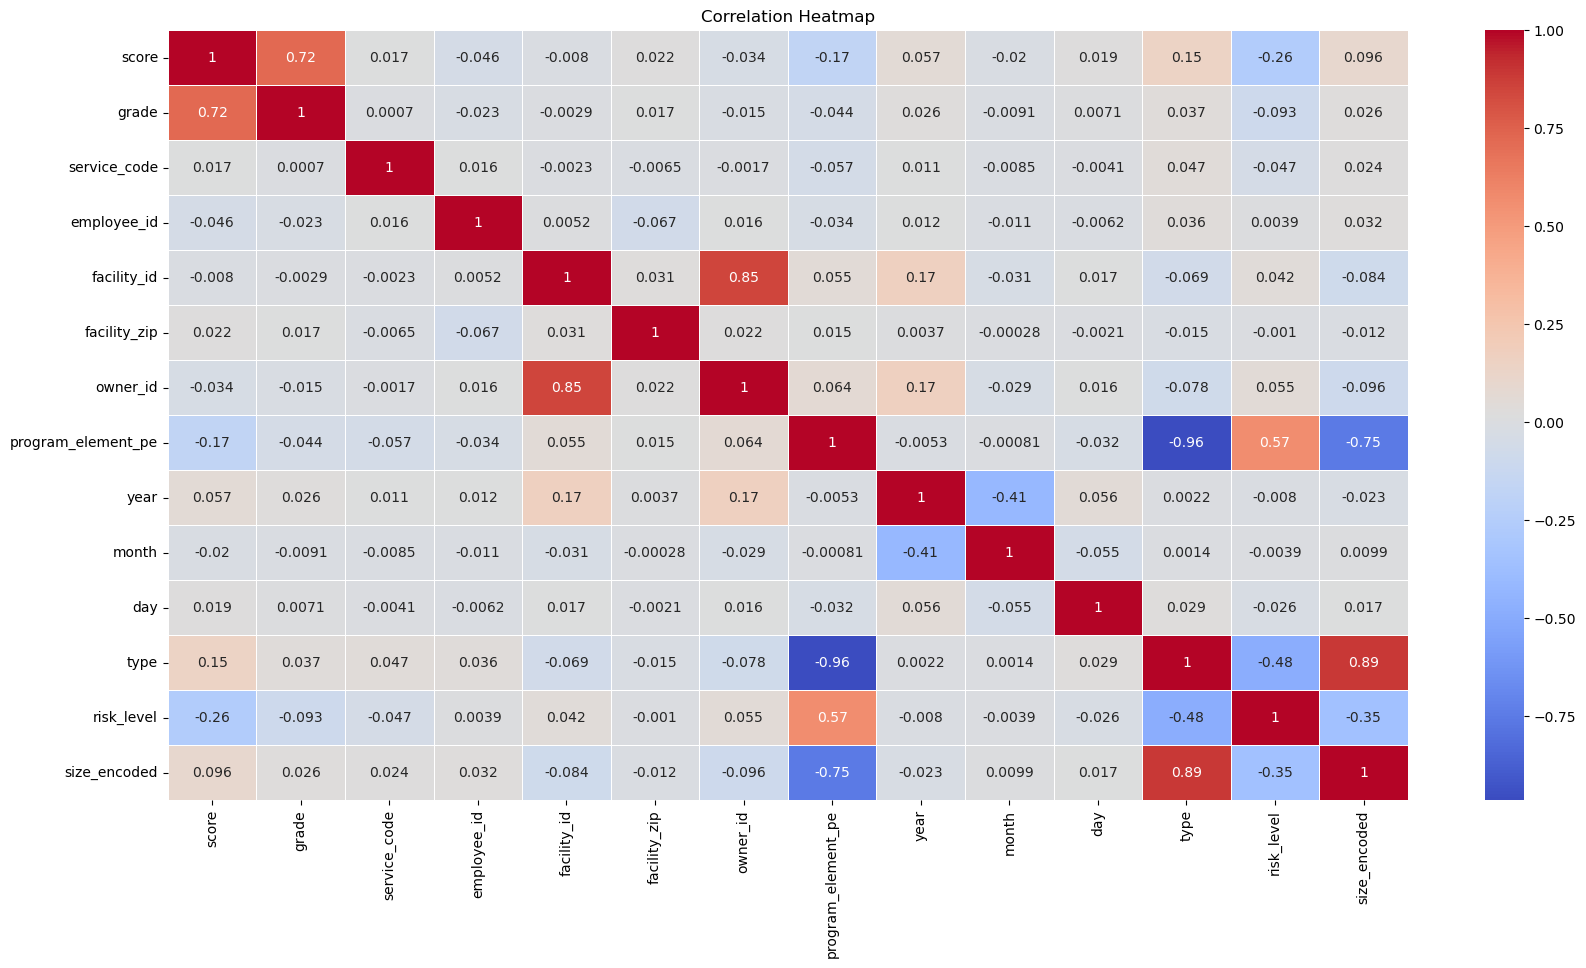

In [494]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data2_numeric = data2.select_dtypes(include=['number'])
data2_numeric_clean = data2_numeric.dropna()
correlation = data2_numeric_clean.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The code selects features that have a correlation greater than 0.01 with the 'score' column and shows the list of these selected features.

In [497]:
selected_features = correlation['score'][abs(correlation['score']) > 0.01].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['score', 'grade', 'service_code', 'employee_id', 'facility_zip', 'owner_id', 'program_element_pe', 'year', 'month', 'day', 'type', 'risk_level', 'size_encoded']


In [499]:
df_selected = data2[selected_features]
df_selected

,score,grade,service_code,employee_id,facility_zip,owner_id,program_element_pe,year,month,day,type,risk_level,size_encoded
0,95.0,3.0,1,923,90065,178123,1631.0,2017,12,29,0.0,1.0,1.0
1,94.0,3.0,1,633,90045,208441,1631.0,2017,12,29,0.0,1.0,1.0
2,93.0,3.0,1,835,90028,228670,1630.0,2017,12,29,0.0,0.0,1.0
3,94.0,3.0,1,923,90026,246287,1631.0,2017,12,29,0.0,1.0,1.0
4,94.0,3.0,1,923,90026,246479,1631.0,2017,12,29,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65503,94.0,3.0,1,360,90012,124708,1635.0,2018,6,15,0.0,2.0,2.0
65504,96.0,3.0,1,723,90018,100601,1613.0,2018,5,16,1.0,0.0,8.0
65505,91.0,3.0,1,594,90011,178002,1615.0,2018,4,20,1.0,2.0,8.0
65506,95.0,3.0,1,375,90025,229730,1635.0,2018,4,17,0.0,2.0,2.0


In [501]:
data2 = data2.dropna(subset=['employee_id'])
data2 = data2.dropna(subset=['size_encoded'])

In [503]:
data2.isna().sum()

score                 0
grade                 0
service_code          0
employee_id           0
facility_id           0
facility_zip          0
owner_id              0
program_element_pe    0
year                  0
month                 0
day                   0
type                  0
risk_level            0
size_encoded          0
dtype: int64

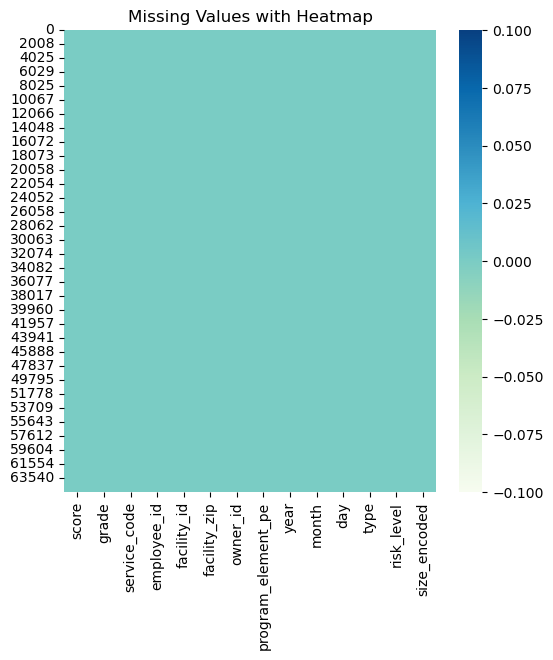

In [505]:
plt.figure(figsize=(6, 6))
sns.heatmap(data=data2.isnull(),cbar=True, cmap="GnBu")
plt.title('Missing Values with Heatmap')
plt.show()

now the dataset is clean from missing values so that we can apply scaling in order to apply feature selection PCA:

# scaling :
The code standardizes the data2 DataFrame using StandardScaler by fitting the scaler to the data and then transforming it, resulting in a new standardized DataFrame data2_std.

In [509]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(data2)
data2_std = sc.transform(data2)

# Feature selection : PCA 

In [512]:
from sklearn.decomposition import PCA
# create the PCA instance
pca = PCA()

# fit on data: Apply PCA on data
data2_pca = pca.fit(data2_std)

In [514]:
#Principal components: eigenvectors
propvect=pca.components_
print(propvect)
print("===================================================")
#Variance proportions associated with the axes: eigenvalues.
propvar=pca.explained_variance_
print(propvar)

[[ 1.80012991e-01  1.01852418e-01  4.05067653e-02  1.83131624e-02
  -1.01574032e-01 -1.06335631e-02 -1.10303021e-01 -5.26306821e-01
  -1.27599838e-02  5.87242410e-03  2.26827126e-02  5.36391373e-01
  -3.67888552e-01  4.81538944e-01]
 [ 1.29284887e-01  1.13314158e-01  1.63071036e-02  1.39883507e-02
   6.35055623e-01  3.94398240e-02  6.30053473e-01 -7.05457300e-02
   3.34614327e-01 -1.97379029e-01  6.38542838e-02  5.67194457e-02
  -6.70702525e-02  2.16884396e-02]
 [-6.52087402e-01 -6.71600568e-01  6.67589039e-03  9.60557606e-02
   1.25652950e-01 -4.53989263e-02  1.40050383e-01 -1.28935726e-01
  -4.56175650e-02  4.52536333e-02 -1.19274819e-02  1.56819707e-01
   5.89667490e-02  1.67435199e-01]
 [ 7.95326818e-02  1.03233288e-01 -2.82895651e-02 -5.02937754e-02
   2.51675736e-01  5.25396665e-02  2.50685140e-01 -1.11560800e-02
  -5.89520586e-01  6.88094396e-01 -1.69245841e-01  4.83400186e-03
  -2.96072625e-02  8.15822075e-03]
 [-5.53242314e-02 -9.42454819e-02 -1.97578610e-01 -6.84166265e-01
  

 transform data/ Projection

In [517]:
B = pca.transform(data2)
print(B)

[[-38768.98528448 224618.76370225  41999.59212384 ...   5092.91535206
    6329.43982413   1118.50623334]
 [-49657.76296098 290852.75382866  55545.93378678 ...   8097.67654179
  -24540.80819908   1298.89153093]
 [-49793.99340808 290530.18923975  55813.84672245 ...   6653.81405235
    4244.1059571    1203.88294129]
 ...
 [-38719.84412659 224348.64075682  41921.80949979 ...   5072.12495673
    6455.33767082   1107.45377734]
 [-31802.37287008 177904.86108042  33501.09285274 ...  -2154.55903901
  130660.20515852    657.68607049]
 [-10677.62061368  57501.09489474   6687.01767136 ...   2217.78613448
  -10175.46583296    971.93414426]]


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


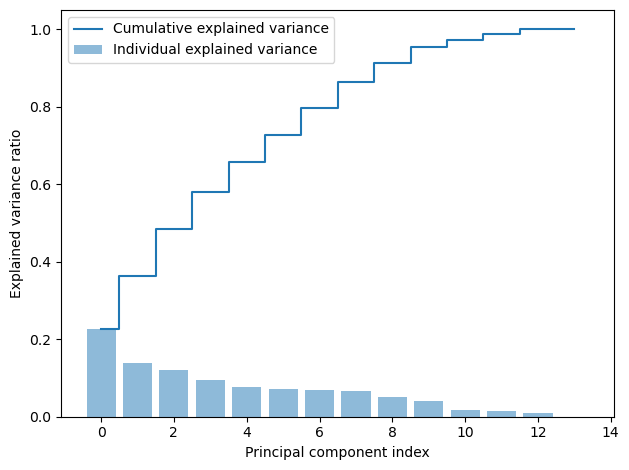

In [519]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


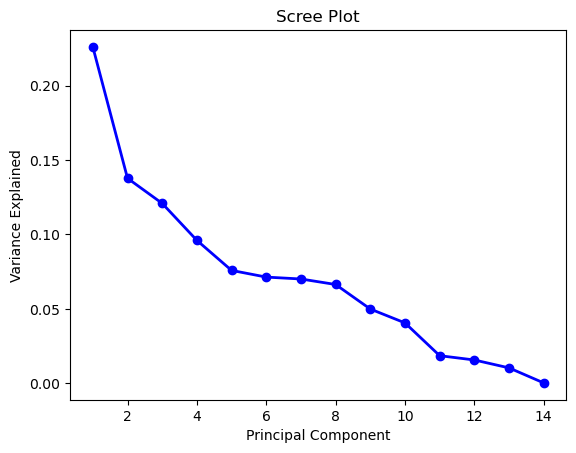

In [521]:
# scree plot
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, exp_var_pca , 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


calculating new axis


In [524]:
pc1 = data2_std.dot(propvect[:,0])
pc2 = data2_std.dot(propvect[:,1])

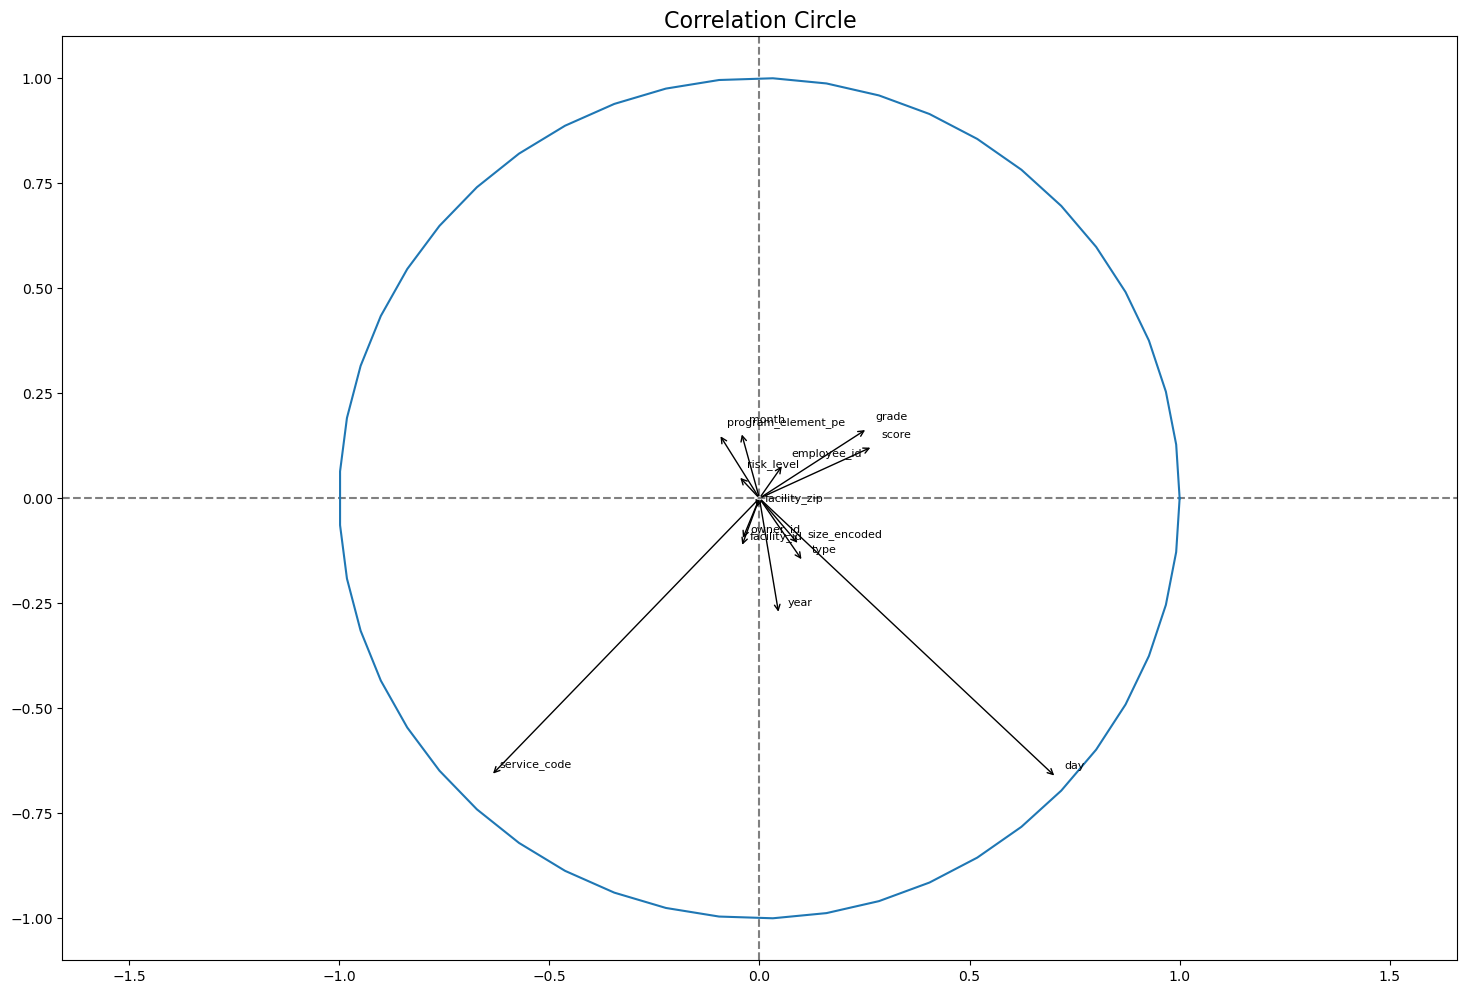

In [526]:
def plot_correlation_circle(pc1, pc2):
    fig, ax = plt.subplots(figsize=(18, 12)) 

    for i in range(data2.shape[1]):
        x = np.corrcoef(pc1, data2[data2.columns[i]])[0, 1]
        y = np.corrcoef(pc2, data2[data2.columns[i]])[0, 1]
        ax.annotate("", xy=(x, y), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
        ax.annotate(data2.columns[i], (x + 0.02, y + 0.02), size=8) 

    ax.set_title('Correlation Circle', fontsize=16) 
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()

plot_correlation_circle(pc1, pc2)


# some visualizations after cleaning : 

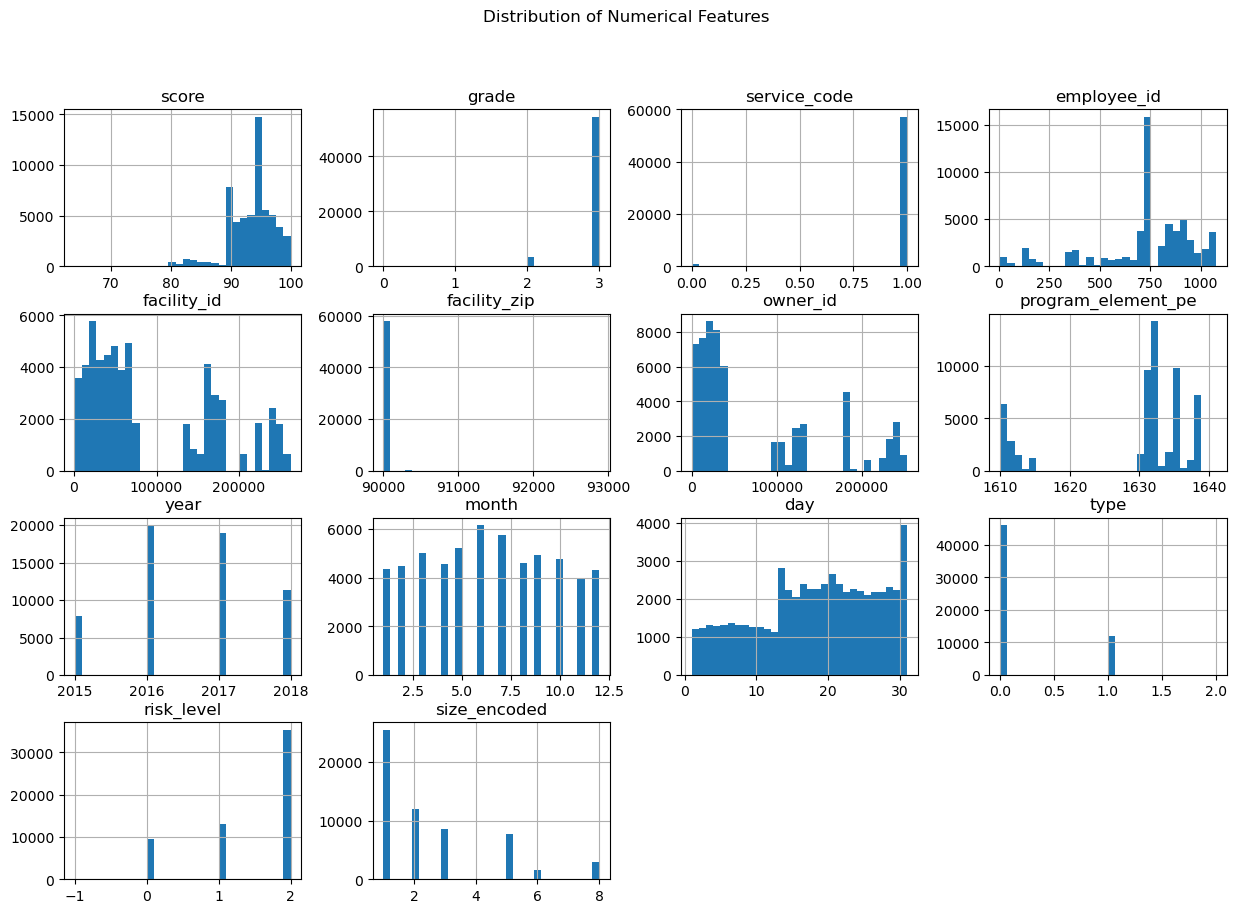

In [585]:
data2.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

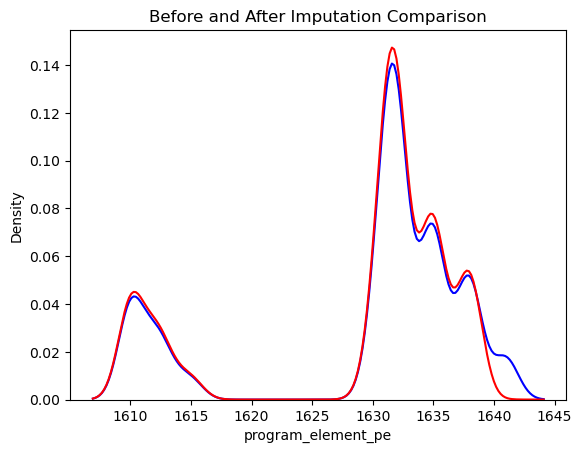

In [580]:
data_before_imputation = data['program_element_pe']
data_after_imputation = data2['program_element_pe']

sns.kdeplot(data_before_imputation, label='Before Imputation', color='blue')
sns.kdeplot(data_after_imputation, label='After Imputation', color='red')
plt.title("Before and After Imputation Comparison")
plt.show()


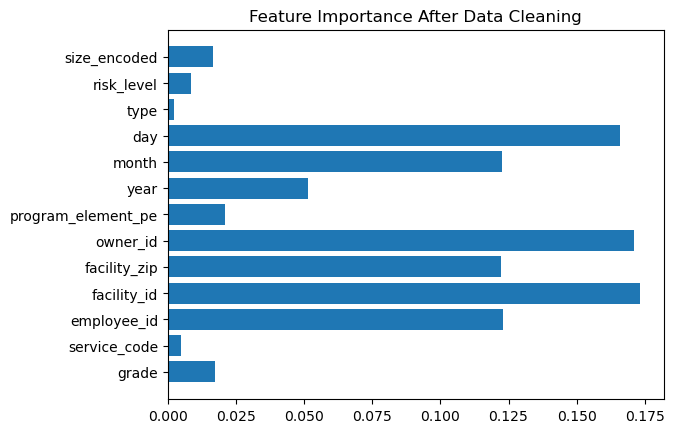

In [587]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(data2.drop('score', axis=1), data2['score'])

feature_importance = model.feature_importances_
features = data2.drop('score', axis=1).columns
plt.barh(features, feature_importance)
plt.title("Feature Importance After Data Cleaning")
plt.show()

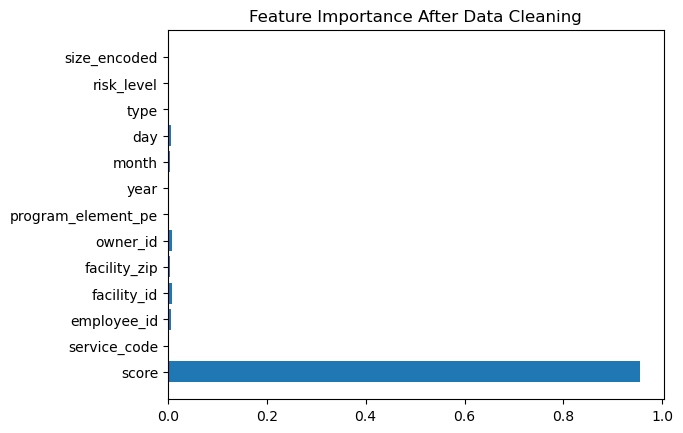

In [593]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(data2.drop('grade', axis=1), data2['grade'])

feature_importance = model.feature_importances_
features = data2.drop('grade', axis=1).columns
plt.barh(features, feature_importance)
plt.title("Feature Importance After Data Cleaning")
plt.show()

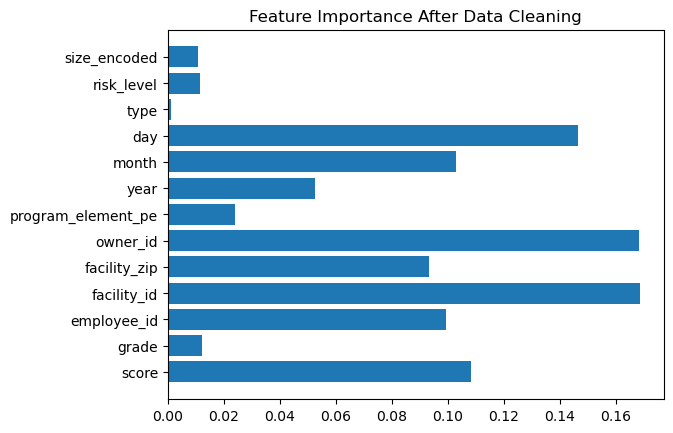

In [595]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(data2.drop('service_code', axis=1), data2['service_code'])

feature_importance = model.feature_importances_
features = data2.drop('service_code', axis=1).columns
plt.barh(features, feature_importance)
plt.title("Feature Importance After Data Cleaning")
plt.show()

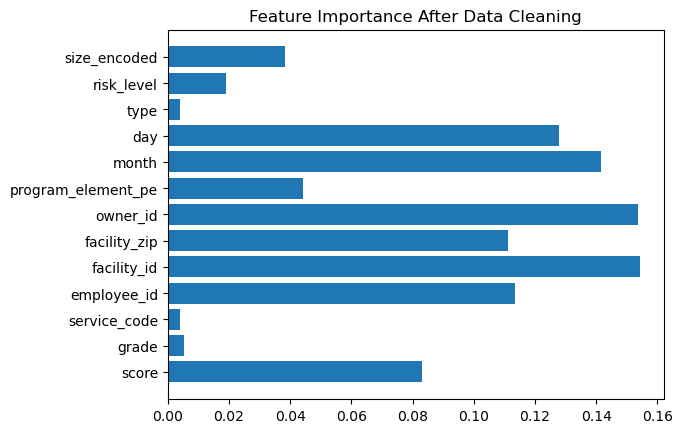

In [597]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(data2.drop('year', axis=1), data2['year'])

feature_importance = model.feature_importances_
features = data2.drop('year', axis=1).columns
plt.barh(features, feature_importance)
plt.title("Feature Importance After Data Cleaning")
plt.show()